<a href="https://colab.research.google.com/github/shweta-todgire/Data-Science-Codes/blob/main/Anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student_data.csv to student_data.csv


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [5]:
# Load the dataset
df = pd.read_csv("/content/student_data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
# Check unique groups in Mjob
print("Mother's job categories:", df['Mjob'].unique())

Mother's job categories: ['at_home' 'health' 'other' 'services' 'teacher']


In [12]:
# Assumption Check - Normality per group
print("\nNormality test (Shapiro-Wilk) per Mjob group:")
for job in df['Mjob'].unique():
    stat, p = stats.shapiro(df[df['Mjob'] == job]['G3'])
    print(f"{job}: p-value = {p:.4f}", "-> Normal" if p > 0.05 else "-> Not normal")


Normality test (Shapiro-Wilk) per Mjob group:
at_home: p-value = 0.0001 -> Not normal
health: p-value = 0.0040 -> Not normal
other: p-value = 0.0000 -> Not normal
services: p-value = 0.0000 -> Not normal
teacher: p-value = 0.0025 -> Not normal


In [13]:
# Assumption Check - Homogeneity of variances
stat, p = stats.levene(
    df[df['Mjob'] == 'at_home']['G3'],
    df[df['Mjob'] == 'health']['G3'],
    df[df['Mjob'] == 'services']['G3'],
    df[df['Mjob'] == 'teacher']['G3'],
    df[df['Mjob'] == 'other']['G3']
)
print("\nLevene's test for equal variances:")
print("p-value =", p, "-> Variances are equal" if p > 0.05 else "-> Variances are not equal")



Levene's test for equal variances:
p-value = 0.9437753301264346 -> Variances are equal


In [7]:
# One-way ANOVA
# H0: mean G3 is the same across all Mjob groups
# H1: at least one group has a different mean

anova_result = stats.f_oneway(
    df[df['Mjob'] == 'at_home']['G3'],
    df[df['Mjob'] == 'health']['G3'],
    df[df['Mjob'] == 'services']['G3'],
    df[df['Mjob'] == 'teacher']['G3'],
    df[df['Mjob'] == 'other']['G3']
)

print("One-way ANOVA result:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

One-way ANOVA result:
F-statistic: 3.754459618901351
p-value: 0.005194749939407733


In [8]:
if anova_result.pvalue < 0.05:
    print("Reject H0: There is a significant difference in G3 across mother's job categories.\n")
else:
    print("Fail to reject H0: No significant difference in G3 across mother's job categories.\n")


Reject H0: There is a significant difference in G3 across mother's job categories.



In [11]:
# Post-hoc test (Tukey HSD)
if anova_result.pvalue < 0.05:
    tukey = pairwise_tukeyhsd(endog=df['G3'], groups=df['Mjob'], alpha=0.05)
    print("Tukey HSD post-hoc results:")
    print(tukey)

Tukey HSD post-hoc results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
 at_home   health   2.9945 0.0189  0.3281  5.661   True
 at_home    other   0.6702 0.8743   -1.25 2.5903  False
 at_home services   1.8669 0.0861 -0.1551 3.8888  False
 at_home  teacher   1.8992 0.1559 -0.3907  4.189  False
  health    other  -2.3244 0.0569 -4.6904 0.0417  False
  health services  -1.1276 0.7149  -3.577 1.3218  False
  health  teacher  -1.0953 0.7947 -3.7702 1.5795  False
   other services   1.1967 0.2474 -0.4085 2.8019  False
   other  teacher    1.229 0.4085 -0.7028 3.1608  False
services  teacher   0.0323    1.0 -2.0007 2.0653  False
-------------------------------------------------------


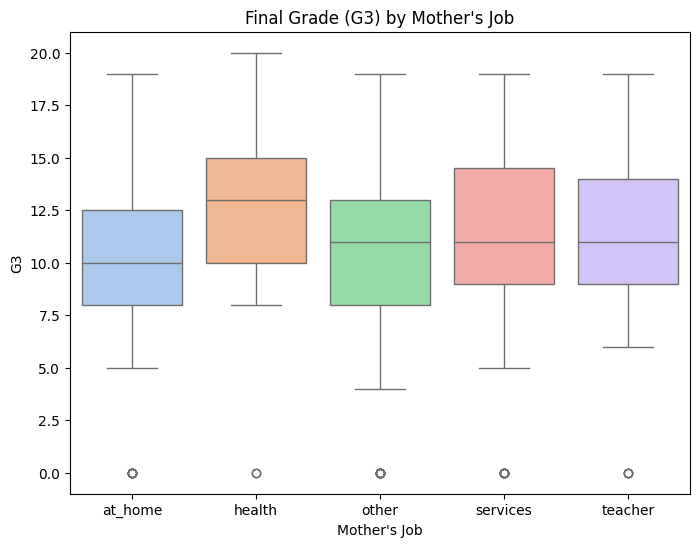

In [16]:
# Visualization
plt.figure(figsize=(8,6))
sns.boxplot(x='Mjob', y='G3', hue='Mjob', data=df, palette='pastel', dodge=False, legend=False)
plt.title("Final Grade (G3) by Mother's Job")
plt.ylabel("G3")
plt.xlabel("Mother's Job")
plt.show()